## Naive Bayes Algorithm

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

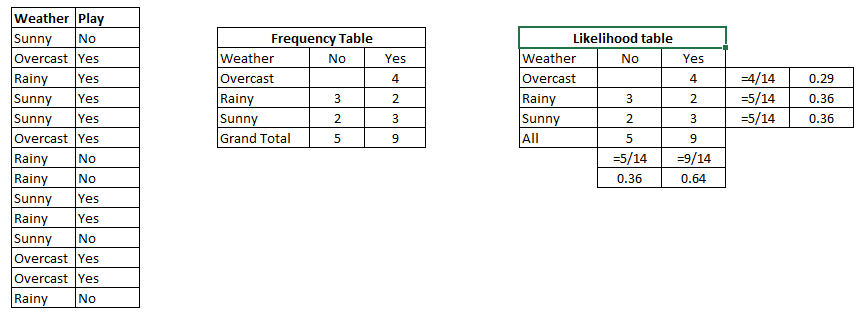

Problem: Players will play if weather is sunny. Is this statement is correct?

We can solve it using above discussed method of posterior probability.

P(Yes | Sunny) = P(Sunny | Yes) * P(Yes) / P (Sunny)

Here we have; P (Sunny | Yes) = 3/9 = 0.33,
              P(Sunny) = 5/14 = 0.36, 
              P(Yes)= 9/14 = 0.64

Now, P (Yes | Sunny) = 0.33 * 0.64 / 0.36 = 0.60, which has higher probability.

Naive Bayes uses a similar method to predict the probability of different class based on various attributes. This algorithm is mostly used in text classification and with problems having multiple classes.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [10]:
db = pd.read_csv('pima-indians-diabetes-2.csv')

In [11]:
from sklearn.model_selection import train_test_split

x = db.drop('class', axis=1)
y = db['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
350,4,92,80,0,0,42.2,0.237,29
449,0,120,74,18,63,30.5,0.285,26
132,3,170,64,37,225,34.5,0.356,30
626,0,125,68,0,0,24.7,0.206,21
50,1,103,80,11,82,19.4,0.491,22


### Train Naive Bayes Algorithm

In [15]:
from sklearn.naive_bayes import GaussianNB  #using Gaussian algorithm from Naive Bayes

#create model
diab_model = GaussianNB()

diab_model.fit(x_train, y_train)

GaussianNB()

### Performance of model with training data

In [17]:
diab_train_predict = diab_model.predict(x_train)

from sklearn import metrics

print('model accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

model accuracy: 0.7803



### Performance of model with testing data

In [18]:
diab_test_predict = diab_model.predict(x_test)

from sklearn import metrics

print('model accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

model accuracy: 0.7532



Confusion matrix


<AxesSubplot:>

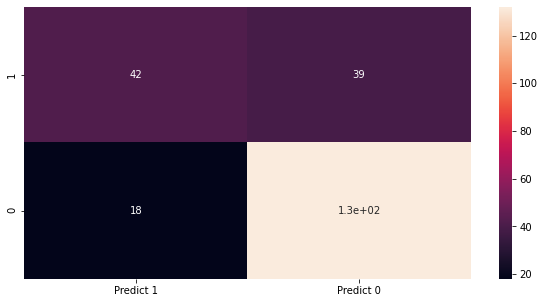

In [19]:
#confusion matrix

print('Confusion matrix')

cm = metrics.confusion_matrix(y_test, diab_test_predict, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ['1', '0']],
                    columns = [i for i in ['Predict 1', 'Predict 0']])

plt.figure(figsize = (10, 5))
sns.heatmap(df_cm, annot=True)

In [20]:
#classification report

print('Classification Report')
print(metrics.classification_report(y_test, diab_test_predict, labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.70      0.52      0.60        81
           0       0.77      0.88      0.82       150

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231

